# Data Exploration

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'I:\AS Projects\Loan Approval\Loan Approval dataset\train.csv', index_col='id')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
id,,,,,,,,,,,,
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.8+ MB


In [4]:
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,58645.0,27.550857,6.033216,20.00,23.00,26.00,30.00,123.00
person_income,58645.0,64046.172871,37931.106979,4200.00,42000.00,58000.00,75600.00,1900000.00
person_emp_length,58645.0,4.701015,3.959784,0.00,2.00,4.00,7.00,123.00
loan_amnt,58645.0,9217.556518,5563.807384,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,58645.0,10.677874,3.034697,5.42,7.88,10.75,12.99,23.22
loan_percent_income,58645.0,0.159238,0.091692,0.00,0.09,0.14,0.21,0.83
cb_person_cred_hist_length,58645.0,5.813556,4.029196,2.00,3.00,4.00,8.00,30.00
loan_status,58645.0,0.142382,0.349445,0.00,0.00,0.00,0.00,1.00


# Data Preprocessing

In [6]:
#dropping outliers
df = df[df['person_age'] != 123]

In [7]:
#dropping all cases where the person started earning before the age of 16
df = df.drop(df[df['person_emp_length']+15 > df['person_age']].index)

In [8]:
df.shape

(58594, 12)

In [9]:
print("Count of loan_status -> 0:", df['loan_status'].value_counts()[0], "\nCount of loan_status -> 1:", df['loan_status'].value_counts()[1],
      "\n% of customers with loan not approved:",  round((df['loan_status'].value_counts()[1] / len(df)) * 100, 2))

Count of loan_status -> 0: 50254 
Count of loan_status -> 1: 8340 
% of customers with loan not approved: 14.23


In [10]:
categorical_columns = df.select_dtypes(include=['object', 'category'])

for column in categorical_columns:
    print(f"Column: {column}")
    value_counts = categorical_columns[column].value_counts()
    print(value_counts)
    print()  # Print a newline for better readability

Column: person_home_ownership
person_home_ownership
RENT        30574
MORTGAGE    24797
OWN          3134
OTHER          89
Name: count, dtype: int64

Column: loan_intent
loan_intent
EDUCATION            12264
MEDICAL              10922
PERSONAL             10007
VENTURE               9998
DEBTCONSOLIDATION     9125
HOMEIMPROVEMENT       6278
Name: count, dtype: int64

Column: loan_grade
loan_grade
A    20965
B    20382
C    11030
D     5028
E     1007
F      149
G       33
Name: count, dtype: int64

Column: cb_person_default_on_file
cb_person_default_on_file
N    49901
Y     8693
Name: count, dtype: int64



In [11]:
# Define mappings for loan_grade
loan_grade_mapping = {
    'G': 1,
    'F': 2,
    'E': 3,
    'D': 4,
    'C': 5,
    'B': 6,
    'A': 7
}

# Apply label encoding to loan_grade
df['loan_grade'] = df['loan_grade'].map(loan_grade_mapping)

# Apply label encoding to cb_person_default_on_file
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'Y': 0, 'N': 1})

In [12]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming your DataFrame is named df

# Initialize the OneHotEncoder with drop='first'
encoder = OneHotEncoder(drop='first')

# Fit and transform the specified columns
encoded_features = encoder.fit_transform(df[['loan_intent', 'person_home_ownership']])

# Convert the sparse matrix to a dense array
encoded_features_dense = encoded_features.toarray()

# Create a DataFrame with new feature names
encoded_df = pd.DataFrame(encoded_features_dense, columns=encoder.get_feature_names_out(['loan_intent', 'person_home_ownership']))

# Concatenate with the original DataFrame
df_encoded = pd.concat([df.reset_index(drop=True), encoded_df], axis=1).drop(['loan_intent', 'person_home_ownership'], axis=1)

In [13]:
from imblearn.over_sampling import SMOTE

# Assuming your DataFrame is named df_encoded and target column is 'loan_status'
X = df_encoded.drop('loan_status', axis=1)  # Features
y = df_encoded['loan_status']                # Target

# Get the number of original samples
original_counts = y.value_counts()

# Current counts
n_approved = original_counts[0]  # Number of approved loans (0)
n_rejected = original_counts[1]   # Number of rejected loans (1)

# Define the desired number of approved loans (keep the same)
target_count_approved = n_approved

# Calculate the number of rejected loans to achieve a 75:25 ratio
# 0.25 * (n_approved + n_rejected) = n_rejected_target
target_count_rejected = int(target_count_approved * 0.25 / 0.75)

# Initialize SMOTE with the calculated sampling strategy
smote = SMOTE(sampling_strategy={0: target_count_approved, 1: target_count_rejected}, random_state=42)

# Apply SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled features and target back into a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['loan_status'] = y_resampled

# Check the result
print(df_resampled['loan_status'].value_counts())

loan_status
0    50254
1    16751
Name: count, dtype: int64


In [14]:
import statsmodels.api as sm

# Assuming df_resampled is your DataFrame
X = df_resampled.drop('loan_status', axis=1)  # Features
y = df_resampled['loan_status']                # Target

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the initial model
model = sm.Logit(y, X)
result = model.fit()

# Backward elimination process
while True:
    p_values = result.pvalues
    max_p_value = p_values.max()
    
    if max_p_value > 0.05:  # Threshold for removal
        # Drop the feature with the highest p-value
        feature_to_drop = p_values.idxmax()
        X = X.drop(columns=[feature_to_drop])
        model = sm.Logit(y, X)
        result = model.fit()
    else:
        break

# Final model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.304713
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.304732
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                67005
Model:                          Logit   Df Residuals:                    66988
Method:                           MLE   Df Model:                           16
Date:                Sun, 13 Oct 2024   Pseudo R-squ.:                  0.4581
Time:                        15:49:06   Log-Likelihood:                -20419.
converged:                       True   LL-Null:                       -37679.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------

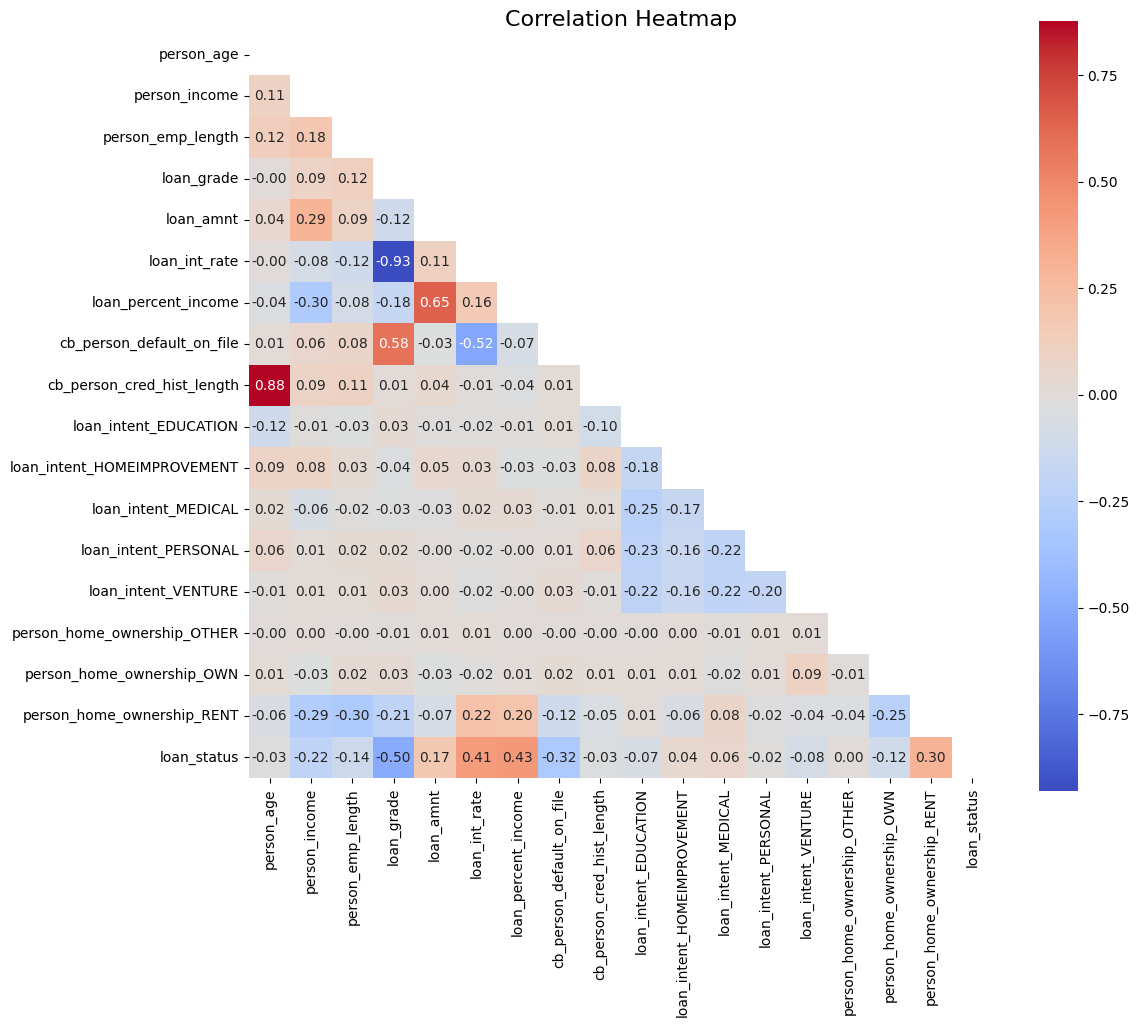

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_resampled is your DataFrame
correlation_matrix = df_resampled.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True, 
            mask=np.triu(correlation_matrix))  # Optional: mask upper triangle

# Set title
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [16]:
# Get the final features from the fitted model
final_features = X.columns.tolist()

if 'const' in final_features:
    final_features.remove('const')
    
# Create a new DataFrame with only the selected features and the target variable
df_selected = df_resampled[final_features + ['loan_status']]

In [17]:
df_selected.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_grade',
       'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_status'],
      dtype='object')

# Modeling

### Random Forest

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming df_resampled is your DataFrame
X = df_selected.drop('loan_status', axis=1)  # Features
y = df_selected['loan_status']                # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[9958   93]
 [ 509 2841]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     10051
           1       0.97      0.85      0.90      3350

    accuracy                           0.96     13401
   macro avg       0.96      0.92      0.94     13401
weighted avg       0.96      0.96      0.95     13401


Accuracy Score: 0.9550779792552795


In [19]:
# Get predicted probabilities
probabilities = rf_model.predict_proba(X_test)

# Confidence for the positive class
confidence_scores = probabilities[:, 1]

# Display the probabilities
print("Confidence Scores for Class 1 (Loan Not Approved):")
print(confidence_scores)

# Optionally, you can also make predictions based on a threshold
threshold = 0.5  # Default threshold
y_pred_custom = (confidence_scores >= threshold).astype(int)

# Evaluate predictions
print("\nAccuracy Score with Default Threshold:", accuracy_score(y_test, y_pred_custom))

Confidence Scores for Class 1 (Loan Not Approved):
[0.05 0.   0.   ... 0.06 0.07 0.08]

Accuracy Score with Default Threshold: 0.9549287366614432


### Decision Tree

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[9479  572]
 [ 525 2825]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95     10051
           1       0.83      0.84      0.84      3350

    accuracy                           0.92     13401
   macro avg       0.89      0.89      0.89     13401
weighted avg       0.92      0.92      0.92     13401


Accuracy Score: 0.9181404372808


### KNN

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors
knn_model.fit(X_train_scaled, y_train)

# Make predictions with KNN
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate KNN
print("KNN Model Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_knn))


KNN Model Performance:
Confusion Matrix:
 [[9817  234]
 [ 827 2523]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     10051
           1       0.92      0.75      0.83      3350

    accuracy                           0.92     13401
   macro avg       0.92      0.86      0.89     13401
weighted avg       0.92      0.92      0.92     13401


Accuracy Score: 0.920826803969853


### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_scaled, y_train)

# Make predictions with Logistic Regression
y_pred_log_reg = log_reg_model.predict(X_test_scaled)

# Evaluate Logistic Regression
print("\nLogistic Regression Model Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_log_reg))


Logistic Regression Model Performance:
Confusion Matrix:
 [[9458  593]
 [1157 2193]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92     10051
           1       0.79      0.65      0.71      3350

    accuracy                           0.87     13401
   macro avg       0.84      0.80      0.82     13401
weighted avg       0.87      0.87      0.87     13401


Accuracy Score: 0.8694127303932543


### Catboost

In [23]:
# pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org catboost

In [24]:
pip show catboost

Name: catboostNote: you may need to restart the kernel to use updated packages.

Version: 1.2.7
Summary: CatBoost Python Package
Home-page: https://catboost.ai
Author: CatBoost Developers
Author-email: 
License: Apache License, Version 2.0
Location: c:\users\tmhaas31\anaconda3\envs\ml\lib\site-packages
Requires: graphviz, matplotlib, numpy, pandas, plotly, scipy, six
Required-by: 


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Logistic Regression Model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_scaled, y_train)

# Make predictions with Logistic Regression
y_pred_log_reg = log_reg_model.predict(X_test_scaled)

# Evaluate Logistic Regression
print("\nLogistic Regression Model Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_log_reg))


Logistic Regression Model Performance:
Confusion Matrix:
 [[9458  593]
 [1157 2193]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92     10051
           1       0.79      0.65      0.71      3350

    accuracy                           0.87     13401
   macro avg       0.84      0.80      0.82     13401
weighted avg       0.87      0.87      0.87     13401


Accuracy Score: 0.8694127303932543


### XGBoost

In [26]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assuming X_train_scaled and y_train are your scaled training features and target
# Create XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
print("\nXGBoost Model Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_xgb))

C:\Users\TMHAAS31\anaconda3\envs\ml\lib\site-packages\xgboost\core.py:158: UserWarning: [15:49:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Model Performance:
Confusion Matrix:
 [[9930  121]
 [ 470 2880]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     10051
           1       0.96      0.86      0.91      3350

    accuracy                           0.96     13401
   macro avg       0.96      0.92      0.94     13401
weighted avg       0.96      0.96      0.96     13401


Accuracy Score: 0.955898813521379


### Finetuning our best performing model ie Random Forest

In [27]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, 
                                   param_distributions=param_grid, 
                                   n_iter=100, 
                                   cv=5, 
                                   n_jobs=-1, 
                                   verbose=2, 
                                   random_state=42)

# Fit Randomized Search
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", random_search.best_params_)

# Use the best estimator from random search
best_rf_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Predict probabilities for AUC-ROC
y_prob = best_rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Evaluate performance
print("\nRandom Forest Model Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC Score:", roc_auc)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\TMHAAS31\anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
255 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
186 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\TMHAAS31\anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TMHAAS31\anaconda3\envs\ml\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\TMHAAS31\anaconda3\envs\ml\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  Fi

Best parameters found:  {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}

Random Forest Model Performance:
Confusion Matrix:
 [[9964   87]
 [ 503 2847]]
Accuracy Score: 0.9559734348182971

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     10051
           1       0.97      0.85      0.91      3350

    accuracy                           0.96     13401
   macro avg       0.96      0.92      0.94     13401
weighted avg       0.96      0.96      0.95     13401

AUC-ROC Score: 0.9668396550725628


# Predicting on validation data

In [28]:
df_test = pd.read_csv(r'I:\AS Projects\Loan Approval\Loan Approval dataset\test.csv', index_col='id')
df_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
id,,,,,,,,,,,
58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [29]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load your test DataFrame (assuming df_test is already loaded)

# 1. Apply label encoding to loan_grade
df_test['loan_grade'] = df_test['loan_grade'].map(loan_grade_mapping)

# 2. Apply label encoding to cb_person_default_on_file
df_test['cb_person_default_on_file'] = df_test['cb_person_default_on_file'].map({'Y': 0, 'N': 1})

# 3. One-hot encode categorical variables
# Fit the encoder only on the training data to prevent data leakage
encoded_features = encoder.transform(df_test[['loan_intent', 'person_home_ownership']])

# Convert the sparse matrix to a dense array
encoded_features_dense = encoded_features.toarray()

# Create a DataFrame with new feature names
encoded_df = pd.DataFrame(encoded_features_dense, columns=encoder.get_feature_names_out(['loan_intent', 'person_home_ownership']), index=df_test.index)

# Concatenate with the original DataFrame
df_test_encoded = pd.concat([df_test, encoded_df], axis=1).drop(['loan_intent', 'person_home_ownership'], axis=1)

# 4. Keep only columns in final_features
df_test_final = df_test_encoded[final_features]

# Display the transformed test DataFrame
print(df_test_final.head())

       person_age  person_income  person_emp_length  loan_grade  loan_amnt  \
id                                                                           
58645          23          69000                3.0           2      25000   
58646          26          96000                6.0           5      10000   
58647          26          30000                5.0           3       4000   
58648          33          50000                4.0           7       7000   
58649          26         102000                8.0           4      15000   

       loan_int_rate  loan_percent_income  cb_person_default_on_file  \
id                                                                     
58645          15.76                 0.36                          1   
58646          12.68                 0.10                          0   
58647          17.19                 0.13                          0   
58648           8.90                 0.14                          1   
58649          16.32 

In [30]:
# Get predicted probabilities on the unseen test set using the trained model
probabilities = best_rf_model.predict_proba(df_test_final)

# Get the probability for the positive class
confidence_scores = probabilities[:, 1]  # Probabilities for class '1'

# Create a DataFrame to hold the index and confidence scores
submission_df = pd.DataFrame({
    'id': df_test_final.index,  # Use the index as ID
    'confidence': confidence_scores
})

# Set the index to be the ID for the output format
submission_df.set_index('id', inplace=True)

# Display the submission DataFrame
print(submission_df.head())

       confidence
id               
58645    0.890000
58646    0.020000
58647    0.740000
58648    0.003333
58649    0.270000


In [31]:
#submission_df.to_csv(r'I:\AS Projects\Loan Approval\Loan Approval dataset\submission_v2.csv', header=True)

# Explanability

In [32]:
# pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org shap

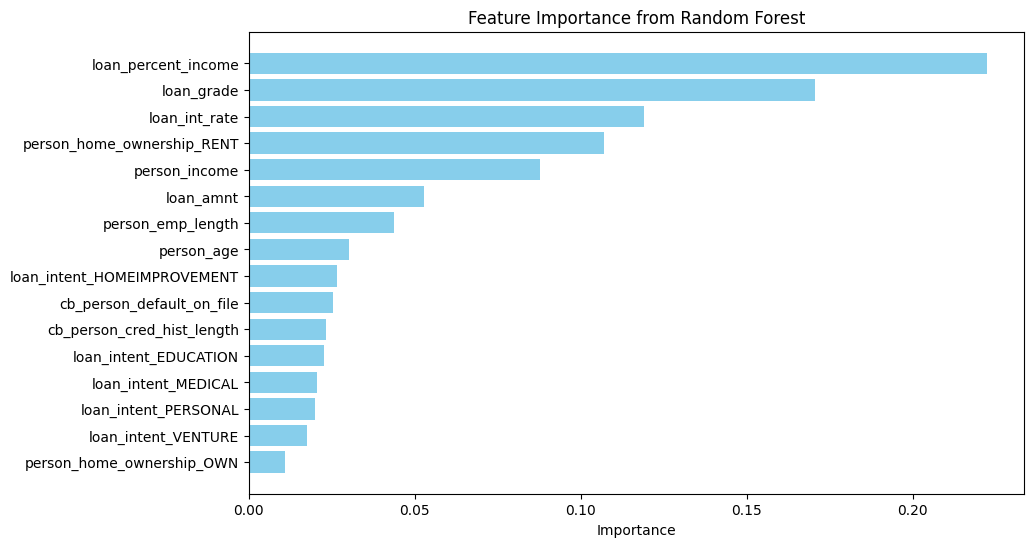

In [33]:
import matplotlib.pyplot as plt

# Get feature importances
importances = best_rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

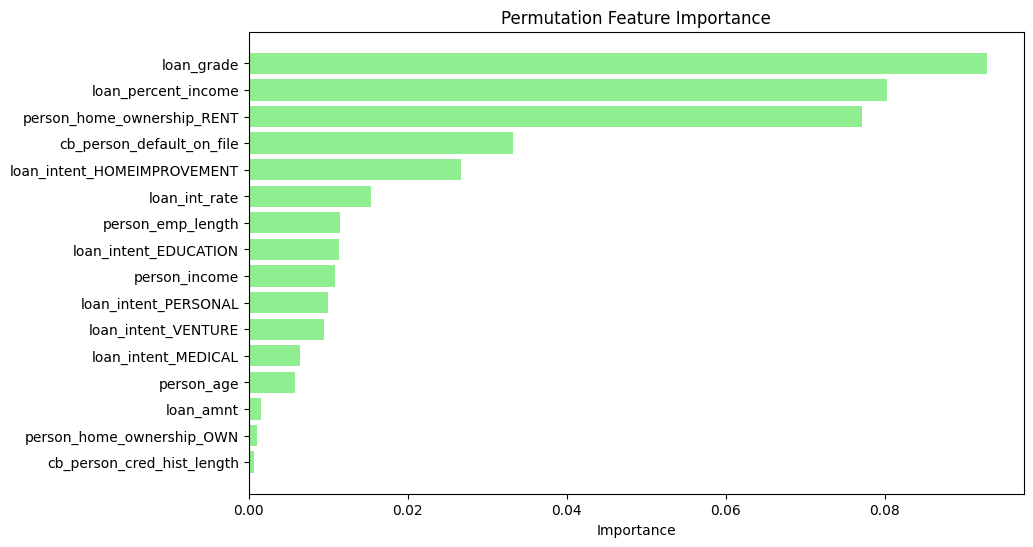

In [34]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(best_rf_model, X_test, y_test, n_repeats=30, random_state=42)

# Create a DataFrame for visualization
perm_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': perm_importance.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

# Plot permutation importances
plt.figure(figsize=(10, 6))
plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance'], color='lightgreen')
plt.xlabel('Importance')
plt.title('Permutation Feature Importance')
plt.gca().invert_yaxis()
plt.show()


In [35]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
